### Task
- predict the type of the class , clustering the dataset using clustering techniques.

In [1]:
### Importing the necessary  modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



### importing and exporting file from AwS s3

In [3]:
import boto3

s3 = boto3.resource("s3")
# Print out bucket names
for bucket in s3.buckets.all():
    print(bucket.name)
# uploading the file
s3.upload_file(
    Filename="C:\\Users\\LakshmiDeepthiGadams\\Desktop\\AWS_S3\\seeds_dataset_copy_s3.txt",
    Bucket="deepu-1896",
    Key="seeds_dataset_copy_s3.txt",
)
# downloading the file

s3 = boto3.client("s3")
s3.download_file(
    Bucket="deepu-1896", # give name of the bucket
    Key="seeds_dataset.csv", #name of your file with extension
    Filename="C:\\Users\\LakshmiDeepthiGadams\\Desktop\\python materials\ASSIGNMENTS_BOURNTEC\\project on classification\\seeds_dataset_copy_s3.csv") # give the location to save your file with extensio

deepu-1896


AttributeError: 's3.ServiceResource' object has no attribute 'upload_file'

In [ ]:
df=pd.read_csv("seeds_dataset_copy_s3.csv").drop('ID',axis=1)
df.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### Pre-processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  210 non-null    float64
 1   perimeter             210 non-null    float64
 2   compactness           210 non-null    float64
 3   lengthOfKernel        210 non-null    float64
 4   widthOfKernel         210 non-null    float64
 5   asymmetryCoefficient  210 non-null    float64
 6   lengthOfKernelGroove  210 non-null    float64
 7   seedType              210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


## Visualizations

#### Univariate analysis

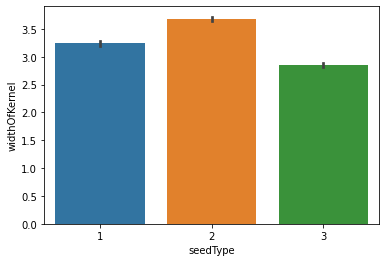

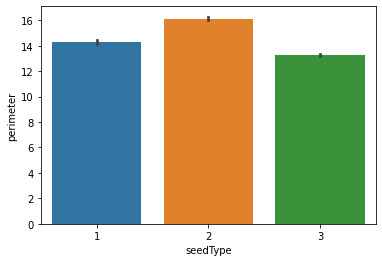

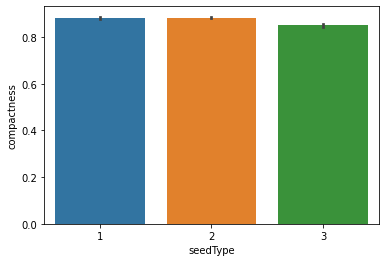

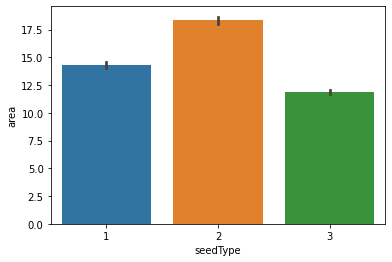

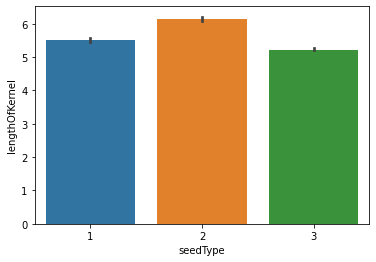

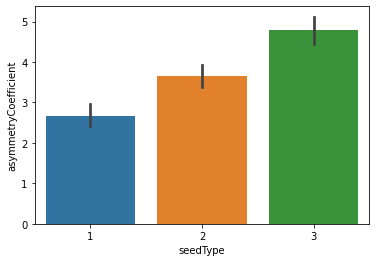

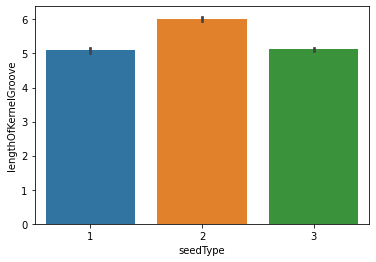

In [ ]:
def bar(x, y,**kwargs):
    fig = plt.figure()
    sns.barplot(x, y,**kwargs)
    return fig
bar(df['seedType'],df['widthOfKernel'])
bar(df['seedType'],df['perimeter'])
bar(df['seedType'],df['compactness'])
bar(df['seedType'],df['area'])
bar(df['seedType'],df['lengthOfKernel'])
bar(df['seedType'],df['asymmetryCoefficient'])
bar(df['seedType'],df['lengthOfKernelGroove'])
plt.show()

#### Multivariate Analysis

<Figure size 1152x576 with 0 Axes>

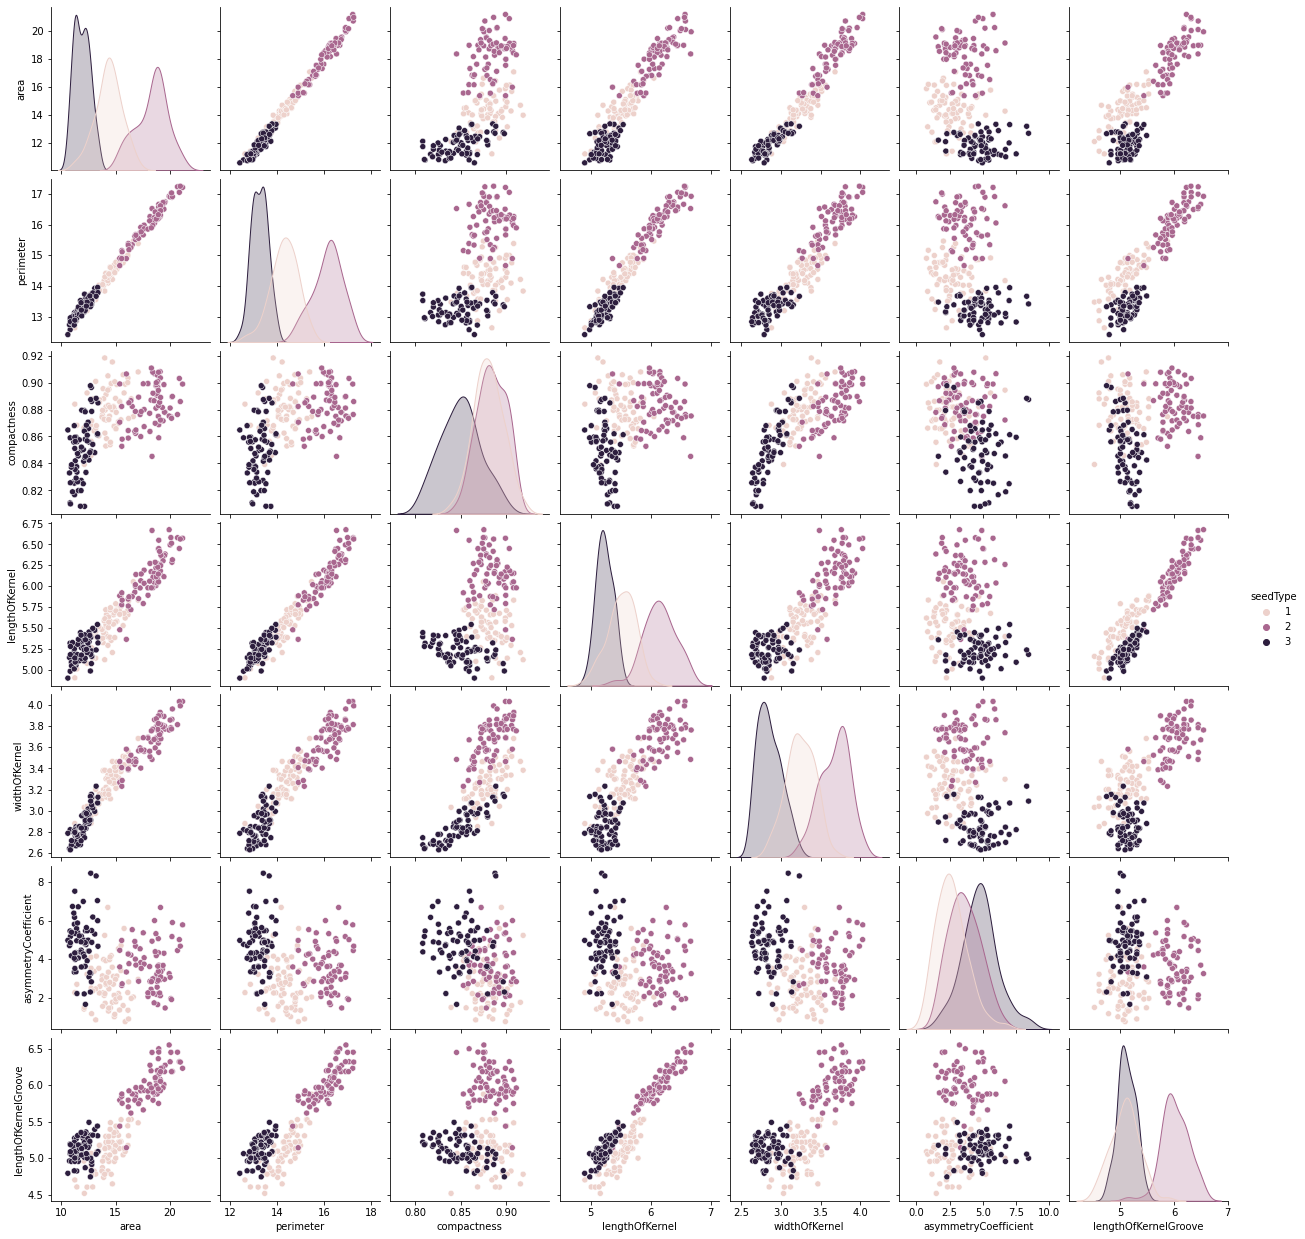

In [ ]:
plt.figure(figsize=(16,8))
sns.pairplot(df,hue='seedType')

<AxesSubplot:xlabel='perimeter', ylabel='compactness'>

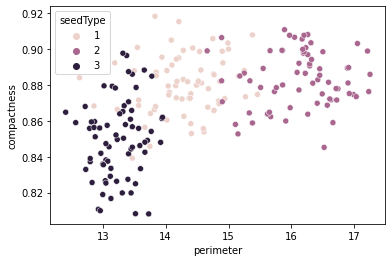

In [ ]:
sns.scatterplot('perimeter','compactness',hue='seedType',data=df)

<AxesSubplot:xlabel='lengthOfKernel', ylabel='compactness'>

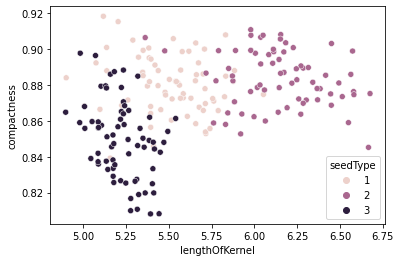

In [ ]:
sns.scatterplot('lengthOfKernel','compactness',hue='seedType',data=df)

<AxesSubplot:xlabel='asymmetryCoefficient', ylabel='lengthOfKernelGroove'>

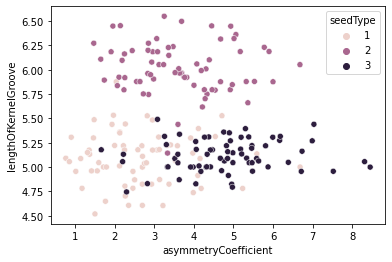

In [ ]:
sns.scatterplot('asymmetryCoefficient','lengthOfKernelGroove',hue='seedType',data=df)

In [ ]:
df.corr()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
lengthOfKernel,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
widthOfKernel,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
asymmetryCoefficient,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
lengthOfKernelGroove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
seedType,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


Length of the kernel groove and length of the kernel had high correlation,
Length of the kernel with all other features also had high correlation.
i cannot interpret which feature can be removed from dataset?

### Normalizing the data

In [ ]:
x=df.drop("seedType",axis=1)
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x=st.fit_transform(x)
df1=pd.DataFrame(x,columns=df.columns[0:7])


In [ ]:
df1.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356


In [ ]:
df1.corr()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
lengthOfKernel,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
widthOfKernel,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
asymmetryCoefficient,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
lengthOfKernelGroove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


### Clustering

In [ ]:
from sklearn.cluster import KMeans,DBSCAN
kmeans=KMeans(n_clusters=3)

In [ ]:
kmeans.fit_transform(x)

array([[3.10382453, 0.95523419, 2.87472269],
       [3.53373988, 1.21783349, 3.74109366],
       [3.28348656, 1.29877639, 4.12003448],
       [3.1450489 , 1.12897793, 4.17699969],
       [4.36638791, 1.73951114, 3.01984415],
       [3.04598156, 0.76294426, 3.78355032],
       [2.46129244, 0.64933675, 3.09416501],
       [2.80255993, 0.5726813 , 3.72819441],
       [4.32569339, 2.39927845, 1.61215587],
       [4.13440174, 1.76430985, 2.01630653],
       [2.48738811, 1.533754  , 2.79811353],
       [2.83143632, 0.77139241, 3.93982398],
       [2.35995692, 1.24895697, 4.12375938],
       [2.1316337 , 0.75888909, 3.9774762 ],
       [2.14910397, 0.86033027, 4.10195236],
       [2.91348864, 1.4814642 , 3.94505162],
       [3.48913163, 2.61274962, 4.68853695],
       [4.12225076, 1.53867785, 3.37195539],
       [4.13059219, 2.04266219, 4.53928924],
       [1.2263035 , 1.6677543 , 4.63133272],
       [2.08326664, 1.12973854, 3.50011181],
       [2.30448842, 0.52371022, 3.4863091 ],
       [4.

In [ ]:
kmeans.cluster_centers_

array([[-1.03025257, -1.00664879, -0.9649051 , -0.89768501, -1.08558344,
         0.69480448, -0.62480856],
       [-0.14111949, -0.17004259,  0.4496064 , -0.25781445,  0.00164694,
        -0.66191867, -0.58589311],
       [ 1.25668163,  1.26196622,  0.56046437,  1.23788278,  1.16485187,
        -0.04521936,  1.29230787]])

TypeError: scatter() got multiple values for argument 's'

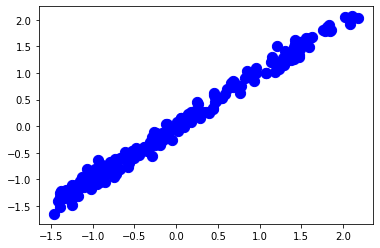

In [ ]:
plt.scatter(x[ : , 0], x[ : , 1], s =105, c='b')
plt.scatter(-1.03025257, -1.00664879, -0.9649051 , -0.89768501, -1.08558344,
         0.69480448, -0.62480856, s=30, c='g', marker='s')
plt.scatter(-0.14111949, -0.17004259,  0.4496064 , -0.25781445,  0.00164694,
        -0.66191867, -0.58589311, s=30, c='r', marker='s')
plt.scatter(1.25668163,  1.26196622,  0.56046437,  1.23788278,  1.16485187,
        -0.04521936,  1.29230787,s=30,c='y',marker='s')
plt.show()